In [178]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
#import warnings
#warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [179]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [180]:
df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv", 
                 sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


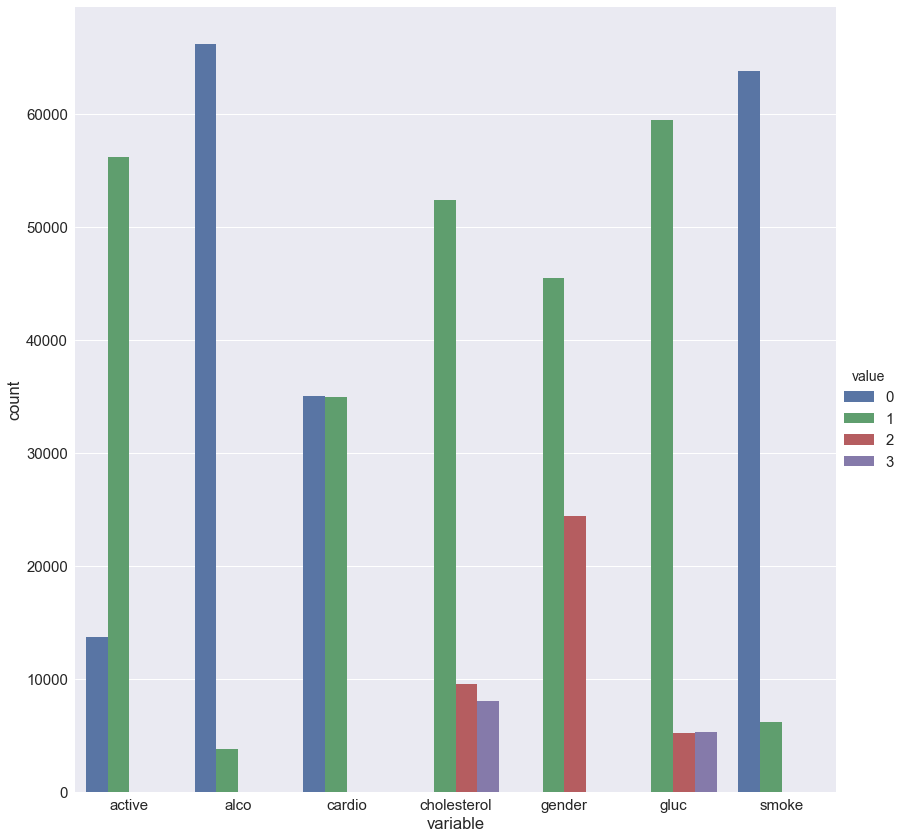

In [181]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

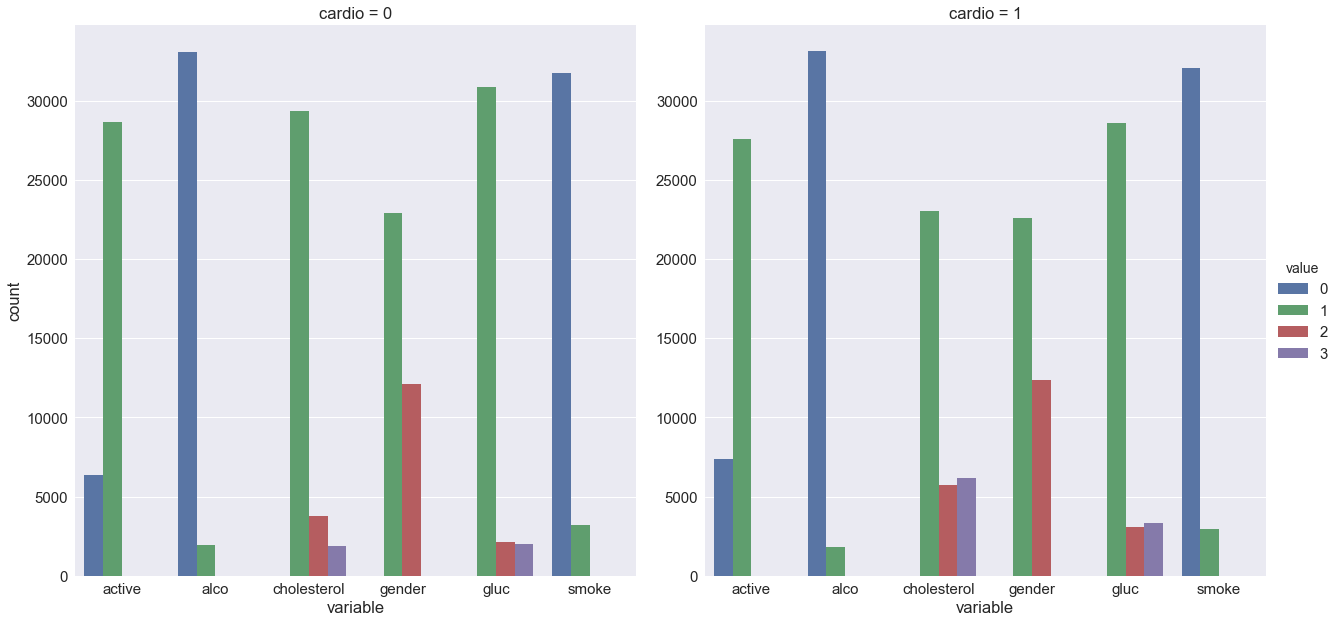

In [182]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

In [183]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


# Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, 
#making the assumption that men are taller on average.

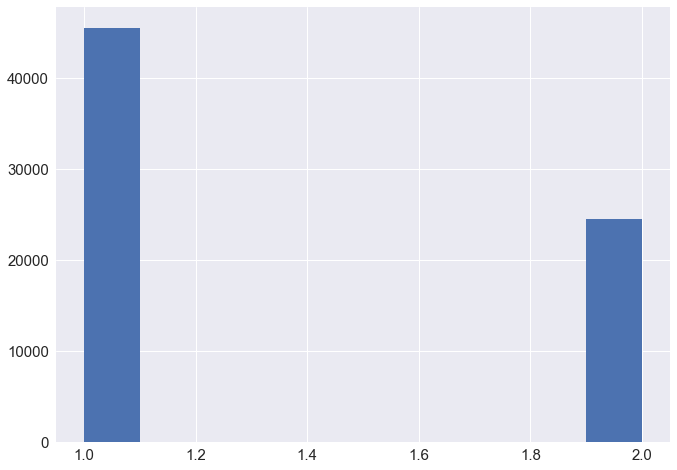

In [184]:
df["gender"].hist();

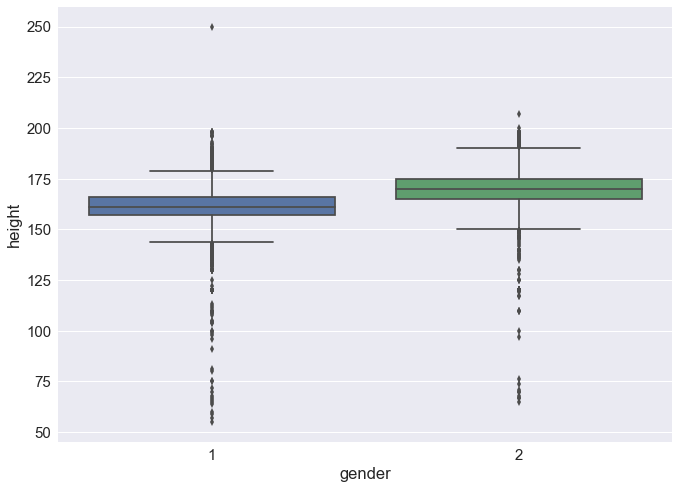

In [185]:
sns.boxplot(x=df["gender"], y=df["height"], data=df);

In [186]:
df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [187]:
round(df.groupby(["gender"])["height"].mean(),2)

gender
1    161.36
2    169.95
Name: height, dtype: float64

# Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?

In [188]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [189]:
round(df.groupby(["gender"])["alco"].mean(),2)

gender
1    0.03
2    0.11
Name: alco, dtype: float64

# Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?

In [190]:
men=round(df[(df["smoke"]==1) & (df["gender"]==2)]["gender"].value_counts() / 
      df[(df["gender"]==2)]["gender"].value_counts() *100,1) 

In [191]:
women=round(df[(df["smoke"]==1) & (df["gender"]==1)]["gender"].value_counts() / 
      df[(df["gender"]==1)]["gender"].value_counts() *100,1)  

In [192]:
m=men.tolist()
w=women.tolist()
print(round(m[0]-w[0],0))

20.0


# Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.

In [193]:
df["age_years"]=df["age"].div(365,25).round()
df["age_months"]=df["age"].div(30,416666666666668).round()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_months
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,613.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,674.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,629.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,587.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,582.0


In [194]:
df[df["smoke"]==1]["age_months"].median() - df[df["smoke"]==0]["age_months"].median()

-19.0

In [195]:
365/12

30.416666666666668

# Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?

In [196]:
#Создайте новый признак age_years – возраст в годах, округлив до целых (round). Для данного задания отберите курящих мужчин от 60 до 64 лет включительно
#Категории уровня холестерина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака cholesterol следующее: 4 ммоль/л →→ 1;  5-7 ммоль/л →→ 2;  8 ммоль/л →→ 3.
#Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.
#Вопрос по-русски звучит так. Во сколько раз (округленно, round) отличаются доли больных людей (согласно целевому признаку, cardio) в этих двух подвыборках? 


In [248]:
l1=df[(df["age_years"]>=60) & (df["age_years"]<=64) & (df["ap_hi"]<120) & 
   (df["cholesterol"]==1)]["cardio"].value_counts(normalize=True)

In [249]:
l2=df[(df["age_years"]>=60) & (df["age_years"]<=64) & (df["ap_hi"]>=160) & (df["ap_hi"]<180) &
   (df["cholesterol"]==3)]["cardio"].value_counts(normalize=True)
print(l1,"\n", l2)

0    0.601232
1    0.398768
Name: cardio, dtype: float64 
 1    0.874172
0    0.125828
Name: cardio, dtype: float64


In [250]:
print(type(l1))
l1=l1.tolist()
l2=l2.tolist()
print(round(l1[1]//l2[1],0))

<class 'pandas.core.series.Series'>
3.0


# Question 1.6. (2 points). Choose the correct statements:

Median BMI in the sample is within the range of normal BMI values.
The BMI for women is on average higher than for men.
Healthy people have, on average, a higher BMI than the people with CVD.
For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

In [200]:
df["BMI"]=df["weight"] / ((df["height"]/100)**2)
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years  age_months        BMI  
0     0       1       0       50.0       613.0  21.967120  
1     0       1       1       55.0       674.0  34.927679  
2     0       0       1       52.0       629.0  23.507805  
3     0       1       1       48.0       587.0  28.710479  
4     0       0       0       48.0       582.0  23.011177  


In [201]:
df["weight"].head()

0    62.0
1    85.0
2    64.0
3    82.0
4    56.0
Name: weight, dtype: float64

In [202]:
df["height"].head()

0    168
1    156
2    165
3    169
4    156
Name: height, dtype: int64

In [203]:
#Median BMI in the sample is within the range of normal BMI values. Normal BMI values are said to be from 18.5 to 25.
round(df["BMI"].median(),1)

26.4

In [204]:
#The BMI for women is on average higher than for men.
print(round(df[df["gender"]==2]["BMI"].mean(),1),"\n", round(df[df["gender"]==1]["BMI"].mean(),1))

26.8 
 28.0


In [205]:
#Healthy people have, on average, a higher BMI than the people with CVD.
print(round(df[df["cardio"]==1]["BMI"].mean(),1),"\n", round(df[df["cardio"]==0]["BMI"].mean(),1))

28.6 
 26.5


In [206]:
#For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women
print(round(df[(df["cardio"]==0) & (df["gender"]==2) & (df["alco"]==0)]["BMI"].mean(),1),"\n", 
round(df[(df["cardio"]==0) & (df["gender"]==1) & (df["alco"]==0)]["BMI"].mean(),1))


25.9 
 26.8


# Question 1.7. (2 points). What percent of the original data (rounded) did we throw away?

In [207]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_months,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,613.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,674.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,629.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,587.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,582.0,23.011177


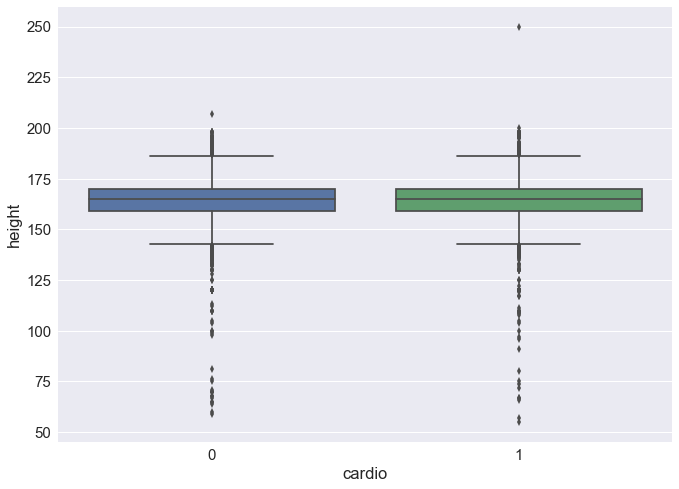

In [208]:
sns.boxplot(x="cardio", y="height", data = df);

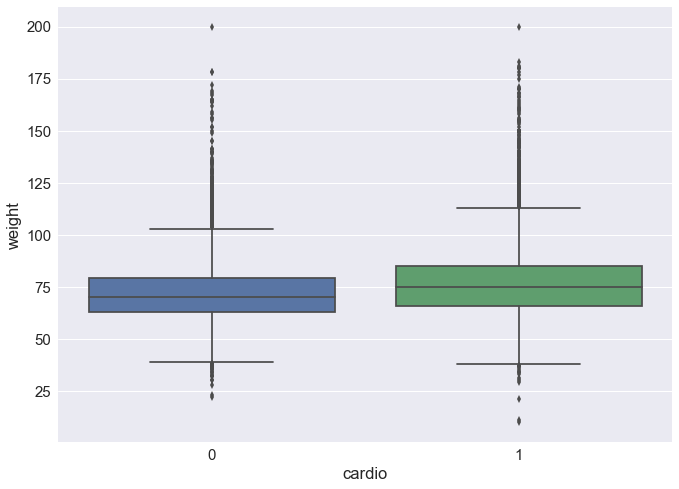

In [209]:
sns.boxplot(x="cardio", y="weight", data = df);

In [241]:
#diastolic pressure is higher than systolic
# height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. 
#height is strictly more than 97.5 percentile
# weight is strictly less than 2.5 percentile
#weight is strictly more than 97.5 percentile
#df[ (df["ap_hi"] < df["ap_lo"])  or (df["height"] < df["height"].quantile(q=0.025)) 
#   or (df["height"] > df["height"].quantile(q=0.975))
#    or (df["weight"] > df["weight"].quantile(q=0.975))
#   or (df["weight"] > df["weight"].quantile(q=0.975))]

In [235]:
mask1 = df.apply(lambda row: row["ap_hi"] < row["ap_lo"], axis=1)
mask2 = df.apply(lambda row: row["height"] < df["height"].quantile(q=0.025), axis=1)
mask3 = df.apply(lambda row: row["height"] > df["height"].quantile(q=0.975), axis=1)
mask4 = df.apply(lambda row: row["weight"] < df["weight"].quantile(q=0.025), axis=1)
mask5 = df.apply(lambda row: row["weight"] > df["weight"].quantile(q=0.975), axis=1)

df[(mask1) | (mask2) | (mask3) | (mask4) | (mask5)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_months,BMI
14,23,14532,2,181,95.0,130,90,1,1,1,1,1,0,40.0,484.0,28.997894
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1,46.0,559.0,37.858302
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0,64.0,779.0,18.491124
44,59,19764,1,154,50.0,170,80,3,1,0,0,1,1,54.0,659.0,21.082813
62,81,20330,2,187,115.0,130,90,1,1,0,1,1,0,56.0,678.0,32.886271


In [237]:
errors=df[(mask1) | (mask2) | (mask3) | (mask4) | (mask5)]
print(len(errors))

6741


In [240]:
round(len(errors) / len(df) * 100,0)

10.0

# Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the gender feature?

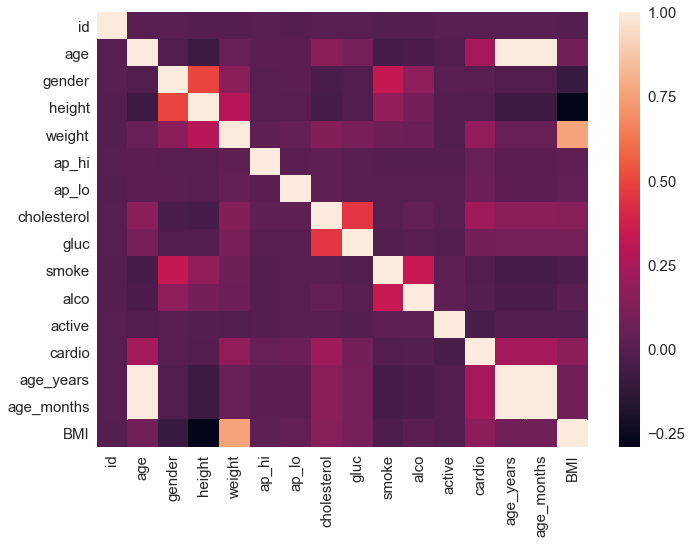

In [212]:
sns.heatmap(df.corr());

In [213]:
df.corr(method="pearson")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_months,BMI
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050,0.003457,-0.001377
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090,0.999994,0.085512
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017,-0.022803,-0.096529
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456,-0.081520,-0.290642
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661,0.053687,0.762009
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793,0.020769,0.024852
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754,0.017624,0.035345
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386,0.154406,0.146270
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596,0.098680,0.101390
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884,-0.047647,-0.027215


# 2.2. Height distribution of men and women

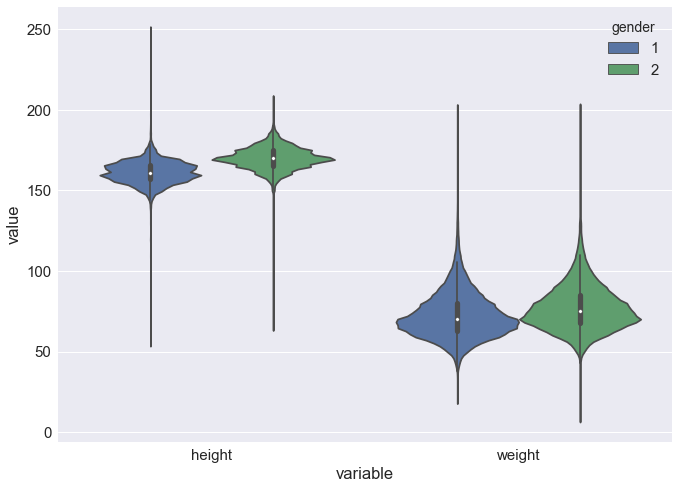

   gender variable  value
0       2   height  168.0
1       1   height  156.0
2       1   height  165.0
3       2   height  169.0
4       1   height  156.0


In [228]:
df1 = pd.melt(df, value_vars=["height", "weight"], id_vars="gender")
sns.violinplot(x="variable", y="value", hue="gender", data=df1)
plt.show()
print(df1.head())

# Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

In [216]:
df.corr(method="spearman")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_months,BMI
id,1.000000,0.002682,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,0.002789,-0.003697,0.001214,0.003766,0.003800,0.002399,0.002689,-0.000472
age,0.002682,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429,0.998048,0.999985,0.107610
gender,0.003506,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109,-0.020697,-0.020170,-0.087531
height,-0.001886,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383,-0.083634,-0.082305,-0.182390
weight,-0.001292,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701,0.062979,0.061575,0.848271
ap_hi,0.003258,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885,0.220780,0.219077,0.281102
ap_lo,-0.000238,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572,0.157957,0.156686,0.250609
cholesterol,0.005706,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117,0.141935,0.140108,0.174008
gluc,0.002789,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488,0.091777,0.091766,0.127857
smoke,-0.003697,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486,-0.047535,-0.047488,-0.024264


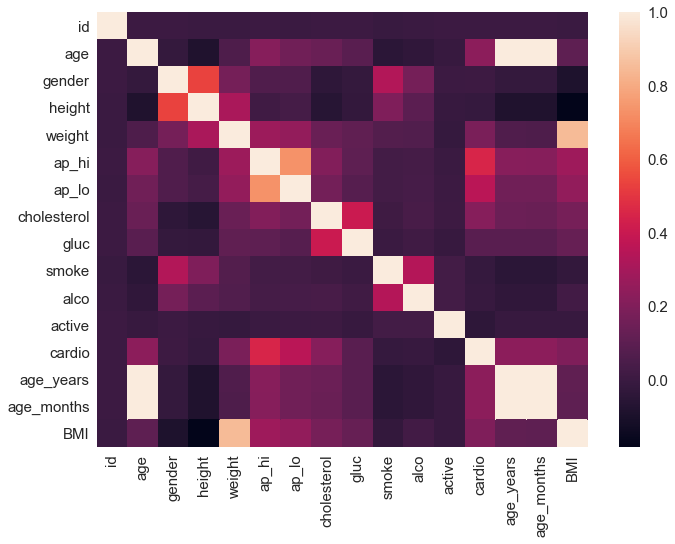

In [217]:
sns.heatmap(df.corr(method="spearman"))

# Question 2.3. (1 point). Why do these features have strong rank correlation?

In [218]:
# The nature of the data

# 2.4. Age Previously, we calculated the age of the respondents in years at the moment of examination. Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

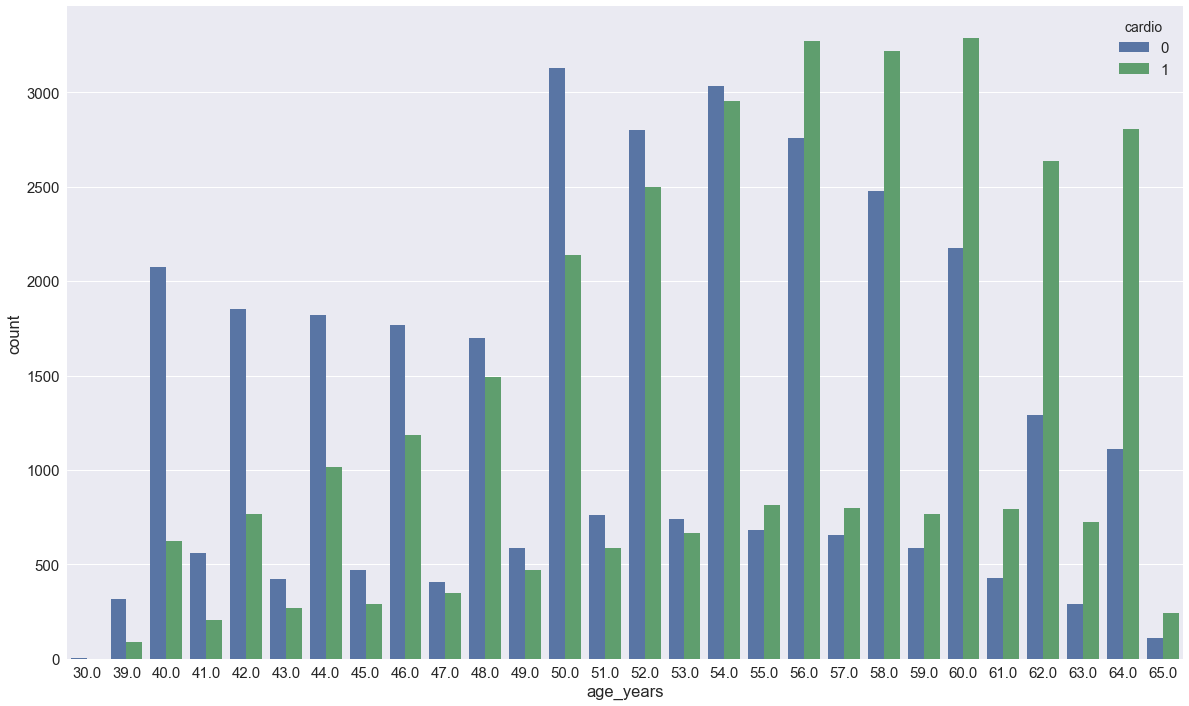

In [219]:
_, axes = plt.subplots(figsize=(20,12))
sns.countplot(x=df["age_years"], hue=df["cardio"], data=df);

# Question 2.4. (1 point). What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

In [220]:
# 55

# ЗАДАЧА НА ПАРЕ от Юли

In [221]:
import this

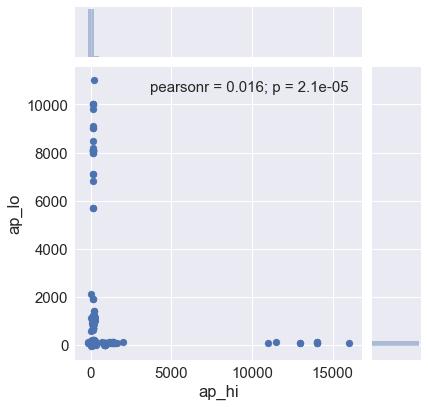

In [222]:
sns.jointplot(df["ap_hi"], df["ap_lo"])

In [223]:
df["ap_lo"].min()

-70

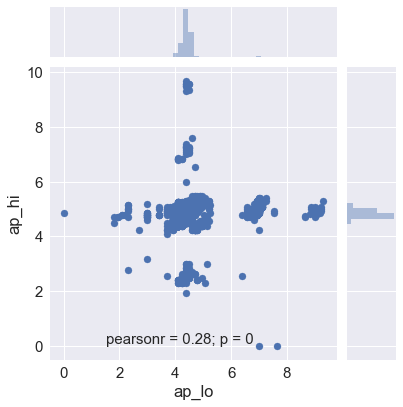

In [224]:
sns.jointplot(df[(df["ap_lo"]>0) & (df["ap_hi"]>0)]["ap_lo"].apply(np.log), 
              df[(df["ap_lo"]>0) & (df["ap_hi"]>0)]["ap_hi"].apply(np.log))